<a href="https://colab.research.google.com/github/austinbennysmith/OSOM-ERDDAP/blob/master/URI_PP_SurfaceSonde.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook plots a variety of variables stored in the URI_PP_SurfaceSonde dataset at the NERACOOS ERDDAP server. Each variable is plotted against time.

In [ ]:
!pip install netCDF4
import requests
from netCDF4 import Dataset as NetCDFFile
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
#To use cartopy in a Colab notebook, I need a particular sequence of installs (as shown at this notebook: https://colab.research.google.com/github/adamlamee/CODINGinK12/blob/master/notebooks/quakes.ipynb#scrollTo=3LkZkXvnMAr4)
!apt-get -qq install python-cartopy python3-cartopy;
!pip uninstall -y shapely;
!pip install shapely --no-binary shapely;
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from matplotlib.axes import Axes
from cartopy.mpl.geoaxes import GeoAxes
GeoAxes._pcolormesh_patched = Axes.pcolormesh
import calendar
import datetime

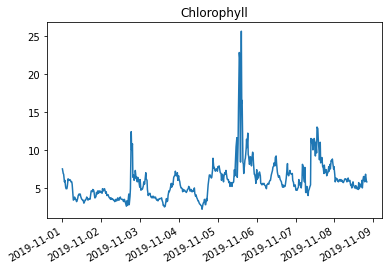

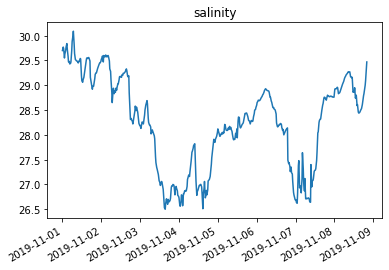

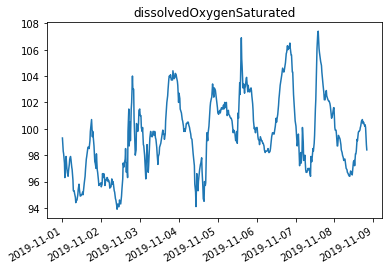

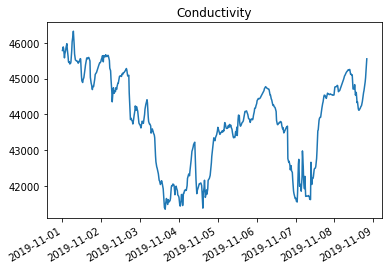

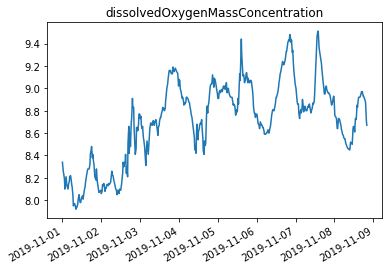

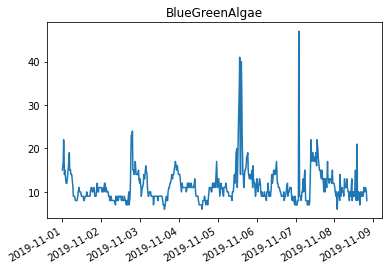

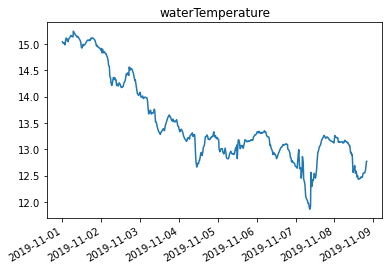

In [6]:
#generating the url (copied interactively from the ERDDAP server) and opening the dataset:
url = 'http://www.neracoos.org/erddap/tabledap/URI_PP_SurfaceSonde.nc?time%2Cstation_name%2Clatitude%2Clongitude%2Cdepth%2Cchlorophyll%2Csalinity%2CdissolvedOxygenSaturated%2CwaterTemperature%2Cconductivity%2CdissolvedOxygenMassConcentration%2CblueGreenAlgae&time%3E=2019-11-01T00%3A00%3A00Z&time%3C=2019-11-08T20%3A00%3A00Z'
r = requests.get(url, allow_redirects=True)
open('test.nc', 'wb').write(r.content)
nc = NetCDFFile('test.nc')
nc
#defining some dataset variables
lat = nc.variables['latitude'][:]
lon = nc.variables['longitude'][:]
chlorophyll = nc.variables['chlorophyll'][:]
salinity = nc.variables['salinity'][:]
time = nc.variables['time'][:]
dO = nc.variables['dissolvedOxygenSaturated'][:]
wtemp = nc.variables['waterTemperature'][:]
conduct = nc.variables['conductivity'][:]
dO2 = nc.variables['dissolvedOxygenMassConcentration'][:]
bga = nc.variables['blueGreenAlgae'][:]
depth = nc.variables['depth'][:]
#making a list of times for plotting purposes
timearray = []
for i in time:
  timearray.append(datetime.fromtimestamp(i))
#the rest of the code simply plots each variable against time
fig, ax = plt.subplots() #this line and the one after it format the x axis to make it legible
fig.autofmt_xdate()
plt.plot(timearray, chlorophyll)
plt.title('Chlorophyll')
plt.show()
fig, ax = plt.subplots()
fig.autofmt_xdate()
plt.plot(timearray, salinity)
plt.title('salinity')
plt.show()
fig, ax = plt.subplots()
fig.autofmt_xdate()
plt.plot(timearray, dO)
plt.title('dissolvedOxygenSaturated')
plt.show()
fig, ax = plt.subplots()
fig.autofmt_xdate()
plt.plot(timearray, conduct)
plt.title('Conductivity')
plt.show()
fig, ax = plt.subplots()
fig.autofmt_xdate()
plt.plot(timearray, dO2)
plt.title('dissolvedOxygenMassConcentration')
plt.show()
fig, ax = plt.subplots()
fig.autofmt_xdate()
plt.plot(timearray, bga)
plt.title('BlueGreenAlgae')
plt.show()
fig, ax = plt.subplots()
fig.autofmt_xdate()
plt.plot(timearray, wtemp)
plt.title('waterTemperature')
plt.show()